In [207]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [208]:
pre_p = '/mnt/volume1/T2D/EMR-data2/'
Cholesterol_file_p = pre_p+'Cholesterol.csv'
BP_file_p = pre_p+'BP.csv'
glucose_p = pre_p+'Glucose.csv'
FamilyHist_file_p = pre_p+'FamilyHist.csv'
OralGlucose_file_p = pre_p+'OralGlucose.csv'
PatPopulation_file_p = pre_p+'PatPopulation.csv'
Vitals_file_p = pre_p+'Vitals.csv'
genome_header = '/mnt/volume1/T2D/header.txt'
output = '/mnt/volume1/T2D/cleanData/feature_max.csv'

In [209]:
Cholesterol_pd = pd.read_csv(Cholesterol_file_p, sep=',')
BP_pd = pd.read_csv(BP_file_p, sep=',')
glucose_pd = pd.read_csv(glucose_p, sep=',')
FamilyHist_pd = pd.read_csv(FamilyHist_file_p, sep=',')
OralGlucose_pd = pd.read_csv(OralGlucose_file_p, sep=',')
PatPopulation_pd = pd.read_csv(PatPopulation_file_p, sep=',')
Vitals_pd = pd.read_csv(Vitals_file_p, sep=',')



In [210]:
def read_header(ps_folder):
    data_arr = []

    with open(ps_folder, 'r') as f:

        lines = f.readlines()

        for line in lines:

            if line != '\n':
                items = line.split(sep='\t')
                data_arr.extend(items)
            else:
                break

    print("--------------------------------")

    return data_arr

In [211]:
#genome_header_pd = pd.read_csv(genome_header, sep='\t', header=None)
head_list = read_header(genome_header)
head_pd = pd.DataFrame(head_list)
head_pd.shape

--------------------------------


(3910, 1)

In [212]:
head_pd.shape

(3910, 1)

In [213]:
head_pd.head()

0
0  MGVKKNZN
1  MNADOVKN
2  MNAODHZZ
3  MNAOGDAK
4  MNATONVG

In [214]:
Cholesterol_pd.shape,BP_pd.shape,glucose_pd.shape,FamilyHist_pd.shape,PatPopulation_pd.shape,Vitals_pd.shape

((5532, 5), (6157, 5), (5693, 3), (3222, 3), (6212, 5), (2911, 7))

In [215]:
len(pd.Series(Cholesterol_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5532

In [216]:
len(pd.Series(BP_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

6157

In [217]:
len(pd.Series(glucose_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5693

In [218]:
len(glucose_pd)

5693

In [219]:
len(pd.Series(FamilyHist_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

3222

In [220]:
#len(pd.Series(OralGlucose_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

In [221]:
len(pd.Series(PatPopulation_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

6212

In [222]:
len(pd.Series(Vitals_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

2911

In [223]:
Vitals_pd = Vitals_pd[['Deidentified_Pat_ID','Weight','Height','BMI']]

In [224]:
Vitals_pd.head()

Deidentified_Pat_ID  Weight  Height     BMI
0            MGVKKNZN  2320.0   23.41  66.000
1            MGVNDNAK  2896.0   23.89  73.000
2            MNANZAKG  3219.2   31.62  66.890
3            MNAOGDAK  3376.0   29.44  70.984
4            MNAZGATG  3340.8   29.13  71.000

In [225]:

res = pd.merge(Vitals_pd,PatPopulation_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.shape

(6212, 8)

In [226]:
FamilyHist_pd.head()

Deidentified_Pat_ID   Family History  type
0            MGVNDNAK         Diabetes     3
1            MNADDANN  Diabetes Type 1     1
2            MNADZOHA         Diabetes     3
3            MNANKNAN  Diabetes Type 2     2
4            MNATONVG         Diabetes     3

In [227]:
FamilyHist_pd = FamilyHist_pd[['Deidentified_Pat_ID','type']]
FamilyHist_pd.columns = ['Deidentified_Pat_ID','family_diabetes_type']
res = pd.merge(res,FamilyHist_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

Deidentified_Pat_ID  Weight  Height     BMI  gender  age  ethnicity  race  \
0            MGVKKNZN  2320.0   23.41  66.000       0   60          3     7   
1            MGVNDNAK  2896.0   23.89  73.000       0   51          3     7   
2            MNANZAKG  3219.2   31.62  66.890       0   38          3     7   
3            MNAOGDAK  3376.0   29.44  70.984       0   41          3     7   
4            MNAZGATG  3340.8   29.13  71.000       0   67          3     7   

   family_diabetes_type  
0                   NaN  
1                   3.0  
2                   NaN  
3                   NaN  
4                   NaN

In [228]:
res.shape

(6212, 9)

In [229]:
BP_pd.head()

Deidentified_Pat_ID      BP  RecordedYear  bp_high  bp_low
0            MGVKKNZN  120/78          2018      120      78
1            MGVNDNAK  102/66          2019      102      66
2            MNAAOKVG  136/80          2017      136      80
3            MNADDANN  134/98          2017      134      98
4            MNADOVKN  139/95          2016      139      95

In [230]:
BP_pd = BP_pd[['Deidentified_Pat_ID','bp_high', 'bp_low']]

res = pd.merge(res,BP_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

Deidentified_Pat_ID  Weight  Height     BMI  gender  age  ethnicity  race  \
0            MGVKKNZN  2320.0   23.41  66.000       0   60          3     7   
1            MGVNDNAK  2896.0   23.89  73.000       0   51          3     7   
2            MNANZAKG  3219.2   31.62  66.890       0   38          3     7   
3            MNAOGDAK  3376.0   29.44  70.984       0   41          3     7   
4            MNAZGATG  3340.8   29.13  71.000       0   67          3     7   

   family_diabetes_type  bp_high  bp_low  
0                   NaN    120.0    78.0  
1                   3.0    102.0    66.0  
2                   NaN    150.0    84.0  
3                   NaN    156.0   104.0  
4                   NaN    128.0    84.0

In [231]:
res.shape

(6212, 11)

In [232]:
Cholesterol_pd.head()

Deidentified_Pat_ID  triglyceride    ldl   hdl  a1c
0            ZNODZHKT          20.0  109.0  74.0  NaN
1            ZHOHTGGV          23.0   19.0  33.0  5.7
2            ZDVZZVDT          24.0  123.0  75.0  NaN
3            ZDHVKTZT          26.0   85.0  65.0  NaN
4             ZDNVNAN          26.0   59.0  51.0  NaN

In [233]:
res = pd.merge(res,Cholesterol_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()


Deidentified_Pat_ID  Weight  Height     BMI  gender  age  ethnicity  race  \
0            MGVKKNZN  2320.0   23.41  66.000       0   60          3     7   
1            MGVNDNAK  2896.0   23.89  73.000       0   51          3     7   
2            MNANZAKG  3219.2   31.62  66.890       0   38          3     7   
3            MNAOGDAK  3376.0   29.44  70.984       0   41          3     7   
4            MNAZGATG  3340.8   29.13  71.000       0   67          3     7   

   family_diabetes_type  bp_high  bp_low  triglyceride    ldl   hdl  a1c  
0                   NaN    120.0    78.0           NaN    NaN   NaN  NaN  
1                   3.0    102.0    66.0          78.0  119.0  69.0  5.3  
2                   NaN    150.0    84.0         118.0  118.0  44.0  NaN  
3                   NaN    156.0   104.0         111.0  123.0  35.0  NaN  
4                   NaN    128.0    84.0         121.0   75.0  38.0  NaN

In [234]:
res.shape

(6212, 15)

In [235]:
res = pd.merge(res,glucose_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

Deidentified_Pat_ID  Weight  Height     BMI  gender  age  ethnicity  race  \
0            MGVKKNZN  2320.0   23.41  66.000       0   60          3     7   
1            MGVNDNAK  2896.0   23.89  73.000       0   51          3     7   
2            MNANZAKG  3219.2   31.62  66.890       0   38          3     7   
3            MNAOGDAK  3376.0   29.44  70.984       0   41          3     7   
4            MNAZGATG  3340.8   29.13  71.000       0   67          3     7   

   family_diabetes_type  bp_high  bp_low  triglyceride    ldl   hdl  a1c  \
0                   NaN    120.0    78.0           NaN    NaN   NaN  NaN   
1                   3.0    102.0    66.0          78.0  119.0  69.0  5.3   
2                   NaN    150.0    84.0         118.0  118.0  44.0  NaN   
3                   NaN    156.0   104.0         111.0  123.0  35.0  NaN   
4                   NaN    128.0    84.0         121.0   75.0  38.0  NaN   

   gulcose Fasting?  
0      NaN      NaN  
1     94.0      NaN  
2     96.0       No  
3    108.0      NaN  
4      NaN      NaN

In [236]:
res.shape

(6212, 17)

In [237]:
res = pd.merge(res,OralGlucose_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

Deidentified_Pat_ID  Weight  Height     BMI  gender  age  ethnicity  race  \
0            MGVKKNZN  2320.0   23.41  66.000       0   60          3     7   
1            MGVNDNAK  2896.0   23.89  73.000       0   51          3     7   
2            MNANZAKG  3219.2   31.62  66.890       0   38          3     7   
3            MNAOGDAK  3376.0   29.44  70.984       0   41          3     7   
4            MNAZGATG  3340.8   29.13  71.000       0   67          3     7   

   family_diabetes_type  bp_high  bp_low  triglyceride    ldl   hdl  a1c  \
0                   NaN    120.0    78.0           NaN    NaN   NaN  NaN   
1                   3.0    102.0    66.0          78.0  119.0  69.0  5.3   
2                   NaN    150.0    84.0         118.0  118.0  44.0  NaN   
3                   NaN    156.0   104.0         111.0  123.0  35.0  NaN   
4                   NaN    128.0    84.0         121.0   75.0  38.0  NaN   

   gulcose Fasting?  GLUCOSE 1 HR  GLUCOSE 2 HR  GLUCOSE 3 HR  \
0      NaN      NaN           NaN           NaN           NaN   
1     94.0      NaN           NaN           NaN           NaN   
2     96.0       No           NaN           NaN           NaN   
3    108.0      NaN           NaN           NaN           NaN   
4      NaN      NaN           NaN           NaN           NaN   

   GLUCOSE FASTING  HEMOLYSIS INDEX  ICTERIC INDEX  LIPEMIC INDEX  
0              NaN              NaN            NaN            NaN  
1              NaN              NaN            NaN            NaN  
2              NaN              NaN            NaN            NaN  
3              NaN              NaN            NaN            NaN  
4              NaN              NaN            NaN            NaN

In [238]:
res.shape

(6212, 24)

In [239]:
res.describe()

Weight       Height          BMI       gender          age  \
count  2429.000000  2415.000000  2911.000000  6212.000000  6212.000000   
mean   3056.542577    29.680232    67.015456     0.607051    54.553928   
std     726.204867     6.230362     3.742598     0.488445    15.343955   
min    1458.000000    14.620000    57.000000     0.000000    18.000000   
25%    2518.400000    25.325000    64.016000     0.000000    42.000000   
50%    2992.000000    28.780000    66.750000     1.000000    56.000000   
75%    3488.000000    33.050000    69.665500     1.000000    67.000000   
max    7096.000000    65.730000    79.500000     1.000000    90.000000   

         ethnicity         race  family_diabetes_type      bp_high  \
count  6212.000000  6212.000000           3222.000000  6157.000000   
mean      2.943818     6.911301              2.941030   144.162742   
std       0.449224     0.760704              0.266519    18.551480   
min      -1.000000    -1.000000              1.000000    90.000000   
25%       3.000000     7.000000              3.000000   131.000000   
50%       3.000000     7.000000              3.000000   140.000000   
75%       3.000000     7.000000              3.000000   156.000000   
max       3.000000    12.000000              4.000000   228.000000   

            bp_low  triglyceride          ldl          hdl          a1c  \
count  6157.000000   5468.000000  5373.000000  5466.000000  2287.000000   
mean     82.390775    166.619422   122.790955    58.540505     6.367381   
std      11.594975    155.916396    35.991479    17.718897     1.547652   
min       8.000000     20.000000    10.000000    15.000000     3.700000   
25%      74.000000     93.000000    97.000000    46.000000     5.400000   
50%      82.000000    138.000000   120.000000    56.000000     5.800000   
75%      90.000000    199.000000   144.000000    68.000000     6.700000   
max     148.000000   6163.000000   370.000000   166.000000    16.000000   

           gulcose  GLUCOSE 1 HR  GLUCOSE 2 HR  GLUCOSE 3 HR  GLUCOSE FASTING  \
count  5693.000000     82.000000    122.000000     81.000000       122.000000   
mean    117.705270    164.243902    135.032787    105.061728        89.131148   
std      33.343363     27.720190     32.432494     27.710262        11.439348   
min      55.000000     84.000000     46.000000     46.000000        63.000000   
25%      98.000000    148.250000    108.500000     81.000000        82.000000   
50%     106.000000    166.000000    136.000000    109.000000        88.000000   
75%     124.000000    182.000000    157.750000    125.000000        96.000000   
max     249.000000    223.000000    223.000000    185.000000       135.000000   

       HEMOLYSIS INDEX  ICTERIC INDEX  LIPEMIC INDEX  
count        23.000000      23.000000      23.000000  
mean          9.260870       0.956522      14.086957  
std           7.386827       0.638055       8.016534  
min           0.000000       0.000000      -3.000000  
25%           3.500000       1.000000      10.000000  
50%           6.000000       1.000000      13.000000  
75%          15.000000       1.000000      20.000000  
max          27.000000       2.000000      40.000000

In [240]:
len(res[res['gulcose'].notna()]), len(res[res['Fasting?'].notna()])

(5693, 3560)

In [241]:
len(res), len(head_pd)

(6212, 3910)

In [242]:
head_pd.columns = ['Deidentified_Pat_ID']

In [243]:
head_pd.head()

Deidentified_Pat_ID
0            MGVKKNZN
1            MNADOVKN
2            MNAODHZZ
3            MNAOGDAK
4            MNATONVG

In [244]:
res = pd.merge(res,head_pd, how='right',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

Deidentified_Pat_ID  Weight  Height     BMI  gender   age  ethnicity  race  \
0            MGVKKNZN  2320.0   23.41  66.000     0.0  60.0        3.0   7.0   
1            MNAOGDAK  3376.0   29.44  70.984     0.0  41.0        3.0   7.0   
2            MNAZGATG  3340.8   29.13  71.000     0.0  67.0        3.0   7.0   
3            MNGDNAOA  4268.8   43.08  66.000     1.0  55.0        3.0   7.0   
4            MNGGAADT  3539.2   30.86  71.000     0.0  62.0        3.0   7.0   

   family_diabetes_type  bp_high  bp_low  triglyceride    ldl   hdl  a1c  \
0                   NaN    120.0    78.0           NaN    NaN   NaN  NaN   
1                   NaN    156.0   104.0         111.0  123.0  35.0  NaN   
2                   NaN    128.0    84.0         121.0   75.0  38.0  NaN   
3                   NaN    152.0    80.0         100.0  108.0  59.0  NaN   
4                   NaN    152.0   101.0         127.0   90.0  60.0  5.8   

   gulcose Fasting?  GLUCOSE 1 HR  GLUCOSE 2 HR  GLUCOSE 3 HR  \
0      NaN      NaN           NaN           NaN           NaN   
1    108.0      NaN           NaN           NaN           NaN   
2      NaN      NaN           NaN           NaN           NaN   
3     99.0      NaN           NaN           NaN           NaN   
4    112.0       No           NaN           NaN           NaN   

   GLUCOSE FASTING  HEMOLYSIS INDEX  ICTERIC INDEX  LIPEMIC INDEX  
0              NaN              NaN            NaN            NaN  
1              NaN              NaN            NaN            NaN  
2              NaN              NaN            NaN            NaN  
3              NaN              NaN            NaN            NaN  
4              NaN              NaN            NaN            NaN

In [245]:
res.shape

(3910, 24)

In [246]:
res.describe()

Weight       Height          BMI       gender          age  \
count  1535.000000  1530.000000  1831.000000  3909.000000  3909.000000   
mean   3032.718958    29.455307    66.962376     0.598619    55.402661   
std     705.606040     5.907708     3.783876     0.490241    15.228507   
min    1458.000000    17.230000    57.000000     0.000000    19.000000   
25%    2512.000000    25.270000    64.000000     0.000000    43.000000   
50%    2976.000000    28.670000    66.535000     1.000000    57.000000   
75%    3456.000000    32.627500    69.500000     1.000000    68.000000   
max    6348.800000    65.730000    79.000000     1.000000    90.000000   

         ethnicity         race  family_diabetes_type      bp_high  \
count  3909.000000  3909.000000           2026.000000  3880.000000   
mean      2.944743     6.912254              2.947680   144.436856   
std       0.450197     0.768977              0.249893    18.618118   
min      -1.000000    -1.000000              1.000000    90.000000   
25%       3.000000     7.000000              3.000000   132.000000   
50%       3.000000     7.000000              3.000000   140.000000   
75%       3.000000     7.000000              3.000000   156.000000   
max       3.000000    12.000000              4.000000   226.000000   

            bp_low  triglyceride          ldl          hdl          a1c  \
count  3880.000000   3504.000000  3445.000000  3502.000000  1452.000000   
mean     82.413144    165.351027   122.187170    58.601770     6.405510   
std      11.649194    135.801132    35.520014    17.483198     1.552943   
min       8.000000     23.000000    10.000000    15.000000     3.700000   
25%      74.000000     93.750000    97.000000    46.000000     5.400000   
50%      82.000000    138.000000   120.000000    56.000000     5.800000   
75%      89.000000    198.000000   144.000000    69.000000     6.825000   
max     148.000000   2776.000000   370.000000   166.000000    16.000000   

           gulcose  GLUCOSE 1 HR  GLUCOSE 2 HR  GLUCOSE 3 HR  GLUCOSE FASTING  \
count  3619.000000     50.000000     77.000000      50.00000        77.000000   
mean    118.490743    168.140000    137.662338     109.24000        89.272727   
std      33.809903     24.100987     30.865843      25.45469        11.493289   
min      56.000000    108.000000     74.000000      53.00000        65.000000   
25%      98.000000    150.750000    121.000000      94.00000        82.000000   
50%     107.000000    174.000000    139.000000     114.00000        88.000000   
75%     125.000000    181.750000    158.000000     125.75000        96.000000   
max     249.000000    223.000000    223.000000     158.00000       135.000000   

       HEMOLYSIS INDEX  ICTERIC INDEX  LIPEMIC INDEX  
count        15.000000      15.000000      15.000000  
mean          6.600000       1.000000      14.533333  
std           5.487648       0.654654       9.470757  
min           0.000000       0.000000      -3.000000  
25%           2.000000       1.000000      10.500000  
50%           5.000000       1.000000      13.000000  
75%          11.500000       1.000000      20.000000  
max          15.000000       2.000000      40.000000

In [259]:
res

Deidentified_Pat_ID   Weight  Height     BMI  gender   age  ethnicity  \
0               MGVKKNZN  2320.00   23.41  66.000     0.0  60.0        3.0   
1               MNAOGDAK  3376.00   29.44  70.984     0.0  41.0        3.0   
2               MNAZGATG  3340.80   29.13  71.000     0.0  67.0        3.0   
3               MNGDNAOA  4268.80   43.08  66.000     1.0  55.0        3.0   
4               MNGGAADT  3539.20   30.86  71.000     0.0  62.0        3.0   
5               MNGKGTDA  2720.00   25.09  69.000     0.0  50.0        3.0   
6               MNGTHDZT  2544.00   22.81  70.000     0.0  37.0        3.0   
7               MNGZDNGA  2992.00   33.13  63.000     1.0  71.0        3.0   
8               MNKKZDAT  4316.80   42.25  67.000     1.0  49.0        3.0   
9               MNKVZHHN  2544.00   27.75  63.465     1.0  28.0        3.0   
10              MNOKVNGA  2646.40   26.30  66.500     1.0  35.0        3.0   
11              MNOZVONA  3798.40   31.98  72.250     0.0  30.0        3.0   
12              MNTANKOA  3270.40   32.27  66.750     1.0  42.0        3.0   
13              MNVHNHNZ  2844.80   29.80  64.750     1.0  35.0        3.0   
14              MZTDGNKV      NaN     NaN  70.079     1.0  67.0        3.0   
15              MZTHKKKG  3232.00   26.06  73.819     0.0  50.0        2.0   
16              MZTHKONH  2854.40   28.57  66.250     1.0  40.0        3.0   
17              MZTZKGOO  2928.00   31.67  63.750     1.0  32.0        3.0   
18              MZTZVTZO  2113.60   20.68  67.000     1.0  31.0        3.0   
19               ZAAKVND      NaN     NaN  67.000     1.0  54.0        3.0   
20               ZAANNAV  2304.00   25.51  63.000     1.0  40.0        3.0   
21               ZAAOGVG  2873.60   25.77  70.000     1.0  38.0        3.0   
22               ZAAVDKK  3264.00   28.46  71.000     0.0  59.0        3.0   
23                ZADDDG  3662.40   38.09  65.000     1.0  46.0        3.0   
24                ZADGAK  4480.00   41.33  69.000     1.0  64.0        3.0   
25               ZADHKOV  2601.60   25.08  67.500     0.0  62.0        3.0   
26                ZADTOK  2400.00   21.84  69.500     1.0  40.0        3.0   
27                ZADVAV  3926.40   36.22  69.000     1.0  45.0        3.0   
28               ZADVDZV  2542.40   28.58  62.500     1.0  70.0        3.0   
29               ZAGHHKZ  3123.20   31.75  65.748     1.0  49.0        3.0   
30                ZAHHKG  2896.00   33.10  62.000     1.0  69.0        3.0   
31               ZAHHTTD  4566.40   36.90  73.750     0.0  68.0        3.0   
32               ZAHKKAG  4875.20   39.10  74.000     0.0  55.0        3.0   
33                ZAHKTO  2240.00   21.59  67.500     1.0  42.0        3.0   
34               ZAKAVKT  4048.00   40.23  66.500     0.0  66.0        3.0   
35                ZAKNKN  2486.40   25.27  65.748     1.0  54.0        3.0   
36                ZANKTO  1904.00   22.29  61.250     1.0  42.0        3.0   
37               ZAOKNDT  3478.40   34.90  66.200     1.0  33.0        3.0   
38                ZATAKT  2752.00   25.48  69.291     1.0  38.0        3.0   
39                ZATAZH  4336.00   44.08  65.750     1.0  51.0        3.0   
40               ZATDKOO  3728.00   37.63  66.000     0.0  74.0        3.0   
41                ZATDKT  2048.00   21.15  65.250     1.0  72.0        3.0   
42               ZATOHTD  3670.40   32.92  70.000     0.0  49.0        3.0   
43               ZATOKGH  2640.00   28.10  64.250     1.0  67.0        3.0   
44                ZATVNN  3040.00   32.12  64.500     1.0  44.0        3.0   
45                ZATZGH      NaN     NaN  65.984     1.0  63.0        3.0   
46                ZAVGHG  3136.00   32.11  65.531     1.0  55.0        3.0   
47               ZAVGTTA      NaN     NaN  66.000     1.0  26.0        3.0   
48               ZAVHZNK  2864.00   27.77  67.323     1.0  34.0        3.0   
49               ZAVKHVA  2489.60   29.42  61.000     1.0  62.0        3.0   
50               ZAVTKZH  2

In [247]:
len(res[res['a1c']>5.7])

796

In [248]:
len(res[res['a1c']<=5.7])

656

In [257]:
# determine the threshold for missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(res)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:24]

Percent of missing data


[('HEMOLYSIS INDEX', 99.62),
 ('ICTERIC INDEX', 99.62),
 ('LIPEMIC INDEX', 99.62),
 ('GLUCOSE 1 HR', 98.72),
 ('GLUCOSE 3 HR', 98.72),
 ('GLUCOSE 2 HR', 98.03),
 ('GLUCOSE FASTING', 98.03),
 ('a1c', 62.86),
 ('Height', 60.87),
 ('Weight', 60.74),
 ('BMI', 53.17),
 ('family_diabetes_type', 48.18),
 ('Fasting?', 42.61),
 ('ldl', 11.89),
 ('hdl', 10.43),
 ('triglyceride', 10.38),
 ('gulcose', 7.44),
 ('bp_high', 0.77),
 ('bp_low', 0.77),
 ('gender', 0.03),
 ('age', 0.03),
 ('ethnicity', 0.03),
 ('race', 0.03),
 ('Deidentified_Pat_ID', 0.0)]

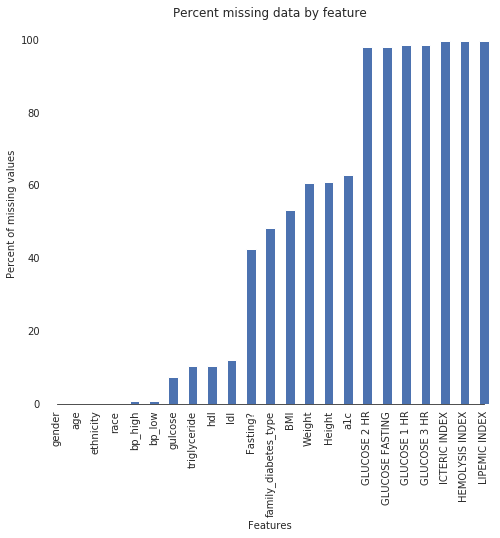

In [250]:
# Visualize missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(res.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

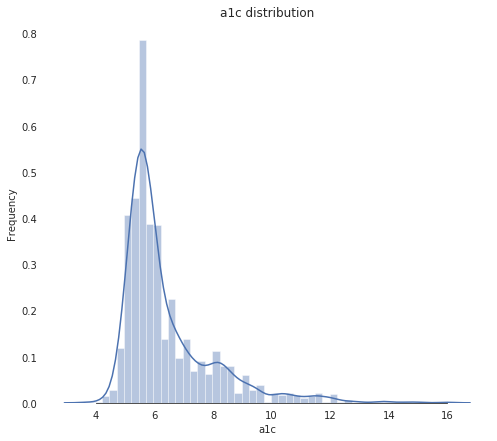

In [251]:
feature_name = 'a1c'
res_bp = res[res[feature_name].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp[feature_name], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel=feature_name)
ax.set(title=feature_name+ " distribution")
sns.despine(trim=True, left=True)
plt.show()

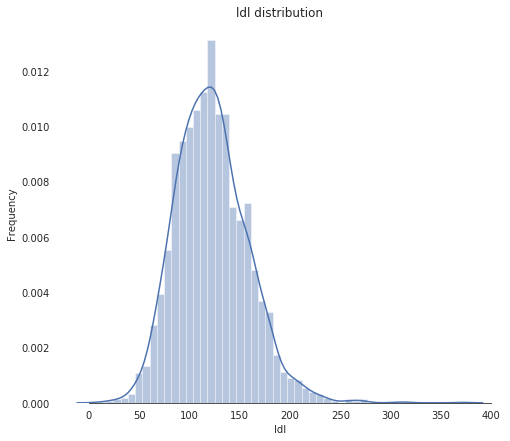

In [252]:
feature_name = 'ldl'
res_bp = res[res[feature_name].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp[feature_name], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel=feature_name)
ax.set(title=feature_name+ " distribution")
sns.despine(trim=True, left=True)
plt.show()

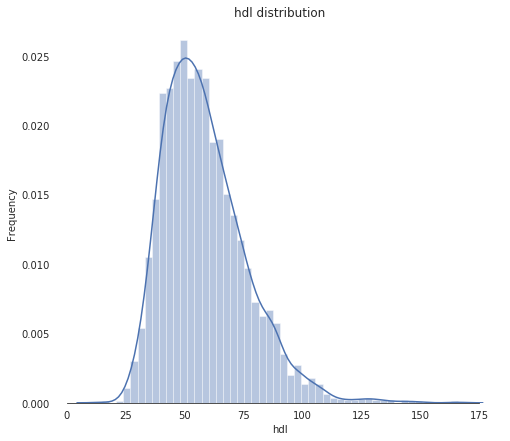

In [253]:
feature_name = 'hdl'
res_bp = res[res[feature_name].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp[feature_name], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel=feature_name)
ax.set(title=feature_name+ " distribution")
sns.despine(trim=True, left=True)
plt.show()

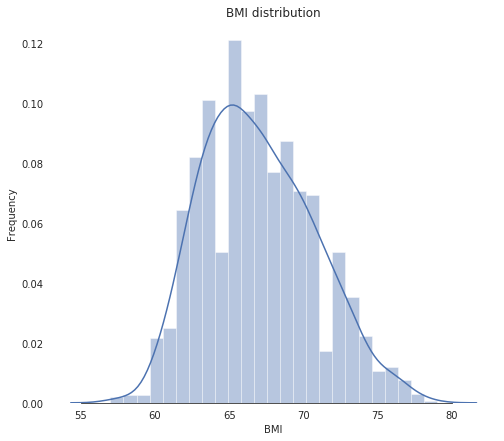

In [254]:
res_bp = res[res['BMI'].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp['BMI'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BMI")
ax.set(title="BMI distribution")
sns.despine(trim=True, left=True)
plt.show()

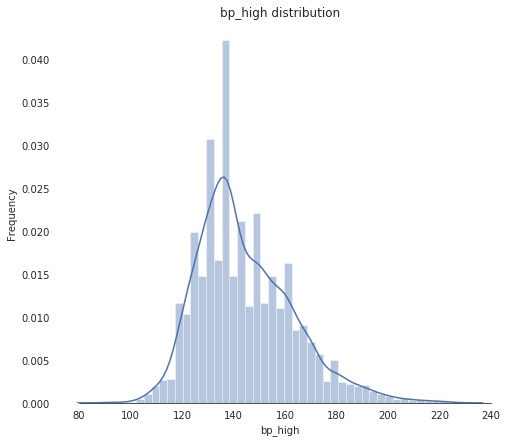

In [255]:
res_bp = res[res['bp_high'].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp['bp_high'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_high")
ax.set(title="bp_high distribution")
sns.despine(trim=True, left=True)
plt.show()

In [256]:
res.to_csv(output, index=False)